In [0]:
! pip install dbfread
! pip install geopandas
! pip install simpledbf

     |████████████████████████████████| 921kB 8.9MB/s 
     |████████████████████████████████| 11.8MB 47.9MB/s 
     |████████████████████████████████| 10.1MB 48.0MB/s 
  Created wheel for simpledbf: filename=simpledbf-0.2.6-cp36-none-any.whl size=13793 sha256=b8d399b601e1cf9507c3a59c39c55e333554deee57c461f038dd21a961e77583
  Stored in directory: /root/.cache/pip/wheels/72/dd/df/cdfb970a508ef9750ebb4b6e035a3410c3d62b5a6a91d2aafc
Successfully built simpledbf


In [0]:
from dbfread import DBF
import pandas as pd
import geopandas as gpd
from simpledbf import Dbf5
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# National wide Plot 

In [0]:
SCZ_counties = pd.read_csv('/content/drive/My Drive/NYL_data/south_central_zone_sm.csv')
census_shape = gpd.read_file('/content/drive/My Drive/1006Capstone-NYLife/tl_2018_us_county/tl_2018_us_county.shp')

In [0]:
census_shape['INTPTLAT'] = census_shape['INTPTLAT'].astype(float)
census_shape['INTPTLON'] = census_shape['INTPTLON'].astype(float)
census_shape_mainland = census_shape[(census_shape['INTPTLAT'] > 25) & (census_shape['INTPTLAT'] < 50) 
                                 &(census_shape['INTPTLON'] > -140)& (census_shape['INTPTLON'] < -60) ]

In [0]:
census_shape_mainland['GEOID'] = census_shape_mainland['GEOID'].astype(int)
census_shape_mainland['SCZ'] = [int(x in list(SCZ_counties.FIPS)) for x in census_shape_mainland.GEOID]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


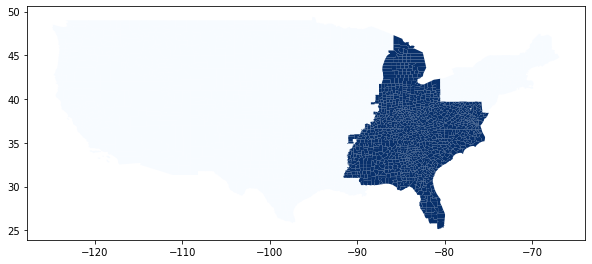

In [0]:
variable = 'SCZ'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
census_shape_mainland.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor=None)

## Office plot 

In [0]:
GO_office = gpd.read_file('/content/drive/My Drive/1006Capstone-NYLife/GO_Addr_v081017_enc/GO_Addr_v081017.shp')
Sales_office = gpd.read_file('/content/drive/My Drive/1006Capstone-NYLife//SLS_Addr_v081017_enc/SLS_Addr_v081017.shp')

In [0]:
GO_office = GO_office[GO_office.ST_CD != 'AK']
GO_office = GO_office[GO_office.ST_CD != 'HI']

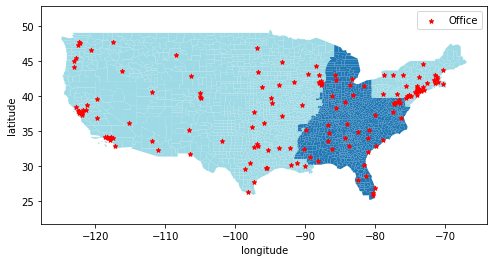

In [0]:
variable = 'SCZ'
# set the range for the choropleth
vmin, vmax = 100, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(8, 4))
census_shape_mainland.plot(column=variable, cmap='tab20_r', linewidth=0.8, ax=ax, edgecolor=None)
GO_office.plot(ax = ax,marker='*', color='red', markersize=20,label = 'Office')
Sales_office.plot(ax = ax,marker='*', color='red', markersize=20)
ax.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.savefig('usa.png')
leg = ax.legend();

# SCZ plot

In [0]:
SCZ_office = pd.read_csv('/content/drive/My Drive/NYL_data/office_concat_countyID_filled.csv')
SCZ_office = SCZ_office.loc[[x in list(SCZ_counties.FIPS) for x in list(SCZ_office.countyID)]	]
SCZ_Sales_office_shape = Sales_office.loc[[x in list(SCZ_office.OU_CD) for x in list(Sales_office.OU_CD)]]
SCZ_GO_office_shape = GO_office.loc[[x in list(SCZ_office.OU_CD) for x in list(GO_office.OU_CD)]]
scz_shape = census_shape_mainland.loc[census_shape_mainland.SCZ == 1]

In [0]:
state = gpd.read_file('/content/drive/My Drive/NYL_data/state_shape_file/cb_2018_us_state_500k.shp')
state = state.loc[[x in ['12','13','18','21','24','26','28','37','39','45','47','51','54','01'] for x in state.STATEFP]]
state['coords'] = state['geometry'].apply(lambda x: x.representative_point().coords[:])
state['coords'] = [coords[0] for coords in state['coords']]

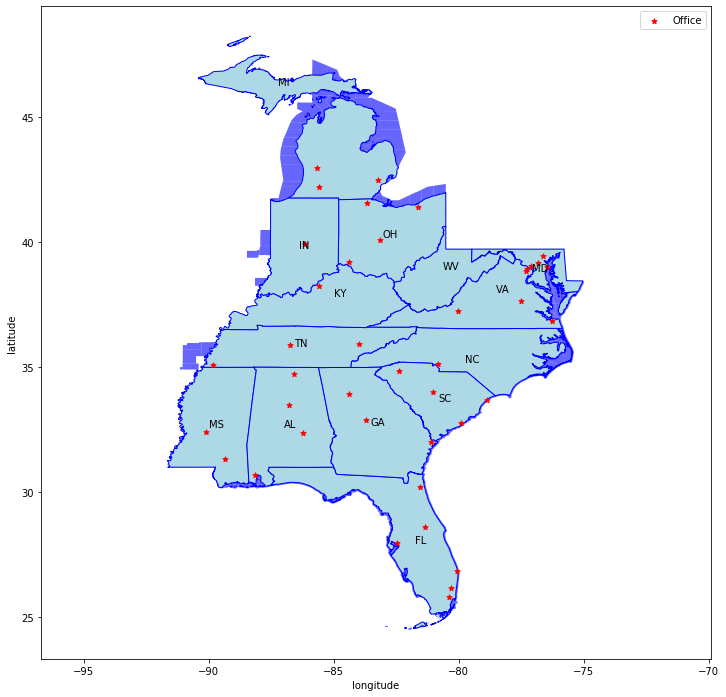

In [0]:
fig, ax = plt.subplots(1, figsize=(12, 12))
scz_shape.plot(ax = ax,color = 'blue',alpha = 0.6,lw = 5)
state.plot(ax = ax,color='lightblue',lw =1,edgecolor = 'blue')
for idx, row in state.iterrows():
    plt.annotate(s=row['STUSPS'], xy=row['coords'],
                 horizontalalignment='center')
SCZ_GO_office_shape.plot(ax = ax,marker='*', color='red', markersize=30,label = 'Office')
SCZ_Sales_office_shape.plot(ax = ax,marker='*', color='red', markersize=30)
ax.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.savefig('scz.png')
leg = ax.legend();

# census tract/ county/ state plot 

In [0]:
ct_shape = gpd.read_file('/content/drive/My Drive/NYL_data/shape_files/tl_2019_13_tract/tl_2019_13_tract.shp')
county_shape = gpd.read_file('/content/drive/My Drive/1006Capstone-NYLife/tl_2018_us_county/tl_2018_us_county.shp')
state_shape = gpd.read_file('/content/drive/My Drive/NYL_data/state_shape_file/cb_2018_us_state_500k.shp')

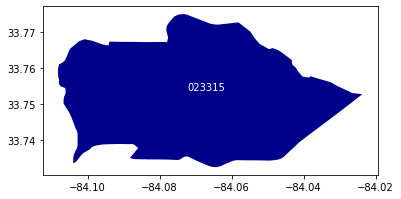

In [0]:
ct = ct_shape.loc[[1964]]
ct['coords'] = ct['geometry'].apply(lambda x: x.representative_point().coords[:])
ct['coords'] = [coords[0] for coords in ct['coords']]
ct.plot(color = 'darkblue')
for idx, row in ct.iterrows():
    plt.annotate(s=row['TRACTCE'], xy=row['coords'],
                 horizontalalignment='center',color = 'white')
#plt.title('cencus tract')

In [0]:
ct

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,coords
1964,13,089,023315,13089023315,233.15,Census Tract 233.15,G5020,S,23306078,363479,+33.7541928,-084.0660228,"POLYGON ((-84.10822 33.75883, -84.10818 33.759...","(-84.06702364907683, 33.75383049999999)"


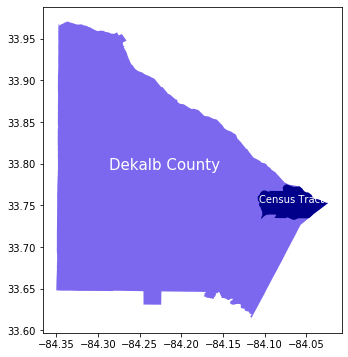

In [0]:
county_shape['coords'] = county_shape['geometry'].apply(lambda x: x.representative_point().coords[:])
county_shape['coords'] = [coords[0] for coords in county_shape['coords']]
fig, ax = plt.subplots(1, figsize=(6,6))
county = county_shape.loc[county_shape.GEOID == '13089']
county.plot(ax = ax,color = 'mediumslateblue')
ct.plot(ax = ax,color = 'darkblue')
for idx, row in ct.iterrows():
    plt.annotate(s='Census Tract', xy=row['coords'],
                 horizontalalignment='center',color = 'white')
for idx, row in county.iterrows():
    plt.annotate(s='Dekalb County', xy=row['coords'],
                 horizontalalignment='center',size = 15,color = 'white')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


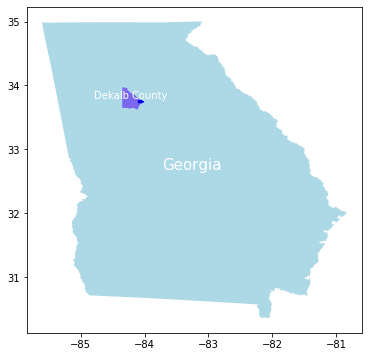

In [0]:
state = state_shape.loc[state_shape.STATEFP == '13']
state['coords'] = state['geometry'].apply(lambda x: x.representative_point().coords[:])
state['coords'] = [coords[0] for coords in state['coords']]
fig, ax = plt.subplots(1, figsize=(6,6))
state.plot(ax = ax,color = 'lightblue')
county = county_shape.loc[county_shape.GEOID == '13089']
county.plot(ax = ax,color = 'mediumslateblue')
ct.plot(ax = ax,color = 'darkblue',edgecolor = 'blue')
#for idx, row in ct.iterrows():
    #plt.annotate(s=row['TRACTCE'], xy=row['coords'],
                 #horizontalalignment='center')
for idx, row in county.iterrows():
    plt.annotate(s='Dekalb County', xy=row['coords'],
                 horizontalalignment='center',color = 'white')
for idx, row in state.iterrows():
    plt.annotate(s=row['NAME'], xy=row['coords'],
                 horizontalalignment='center',size = 15,color = 'white')